In [2]:
#
from google.colab import files

uploaded = files.upload()


Saving ken_admpop_adm1_2019.csv to ken_admpop_adm1_2019.csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_csv('/content/ken_admpop_adm1_2019.csv')

# Preview the dataset
df.head()


,ADM0_NAME,ADM0_PCODE,ADM1_NAME,ADM1_PCODE,F_TL,M_TL,T_TL,F_00_04,F_05_09,F_10_14,...,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96
0,Kenya,KE,Mombasa,KE001,598046.0,610257.0,1208303.0,73178.0,65459.0,58280.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kenya,KE,Kwale,KE002,441681.0,425121.0,866802.0,64761.0,65043.0,62091.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kenya,KE,Kilifi,KE003,749673.0,704089.0,1453762.0,99912.0,102458.0,103193.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Kenya,KE,Tana River,KE004,157391.0,158550.0,315941.0,26006.0,25878.0,22971.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Kenya,KE,Lamu,KE005,67813.0,76103.0,143916.0,9134.0,9241.0,8981.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#
df.columns = df.columns.str.strip().str.lower().str.replace('+', '_').str.replace(' ', '_')


In [6]:
#
df['total_population'] = df['t_tl']


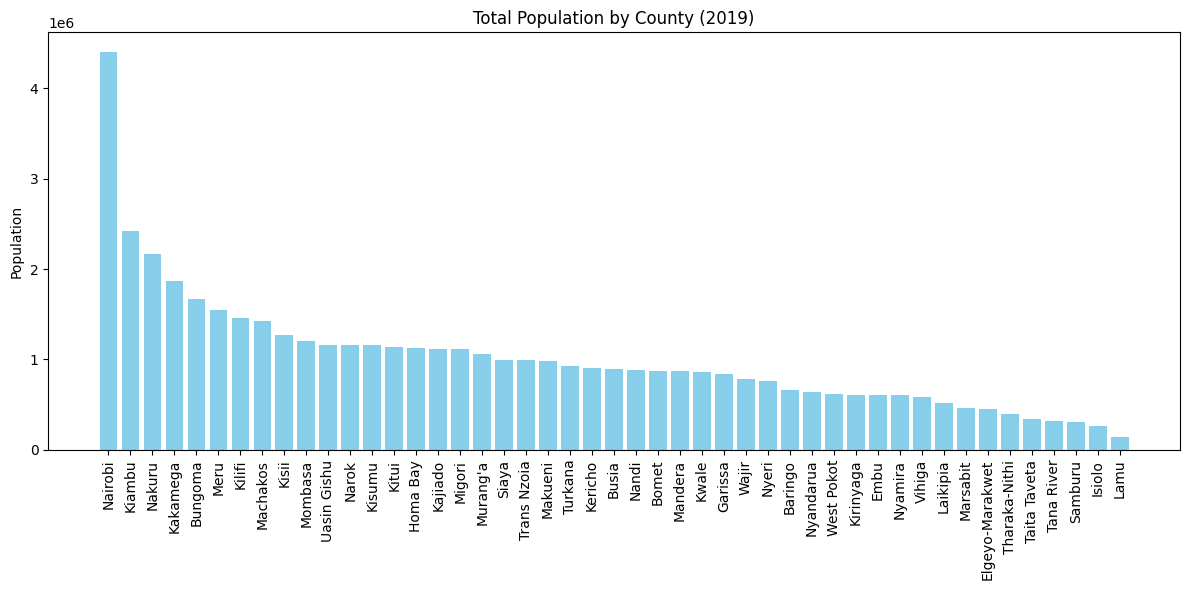

In [8]:
#
county_pop = df[['adm1_name', 'total_population']].sort_values(by='total_population', ascending=False)

# Remove rows where county name is missing
county_pop = county_pop.dropna(subset=['adm1_name'])

plt.figure(figsize=(12,6))
plt.bar(county_pop['adm1_name'], county_pop['total_population'], color='skyblue')
plt.xticks(rotation=90)
plt.title("Total Population by County (2019)")
plt.ylabel("Population")
plt.tight_layout()
plt.show()


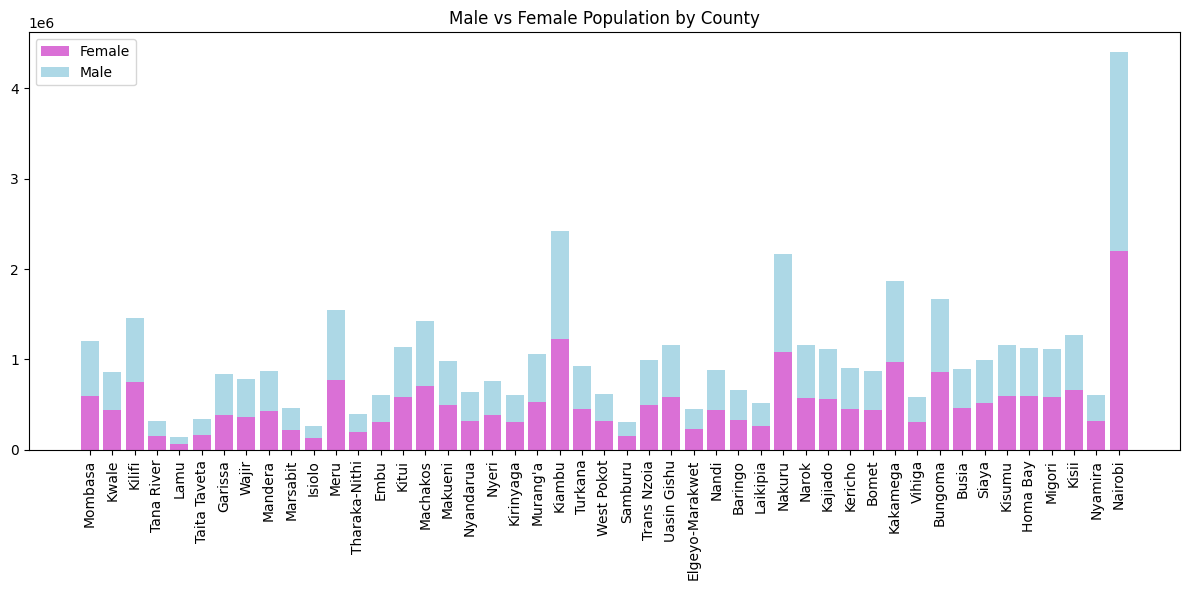

In [10]:
#
# Drop rows where adm1_name (county name) is missing
df = df.dropna(subset=['adm1_name'])

plt.figure(figsize=(12,6))
plt.bar(df['adm1_name'], df['f_tl'], label='Female', color='orchid')
plt.bar(df['adm1_name'], df['m_tl'], label='Male', bottom=df['f_tl'], color='lightblue')
plt.xticks(rotation=90)
plt.title("Male vs Female Population by County")
plt.legend()
plt.tight_layout()
plt.show()


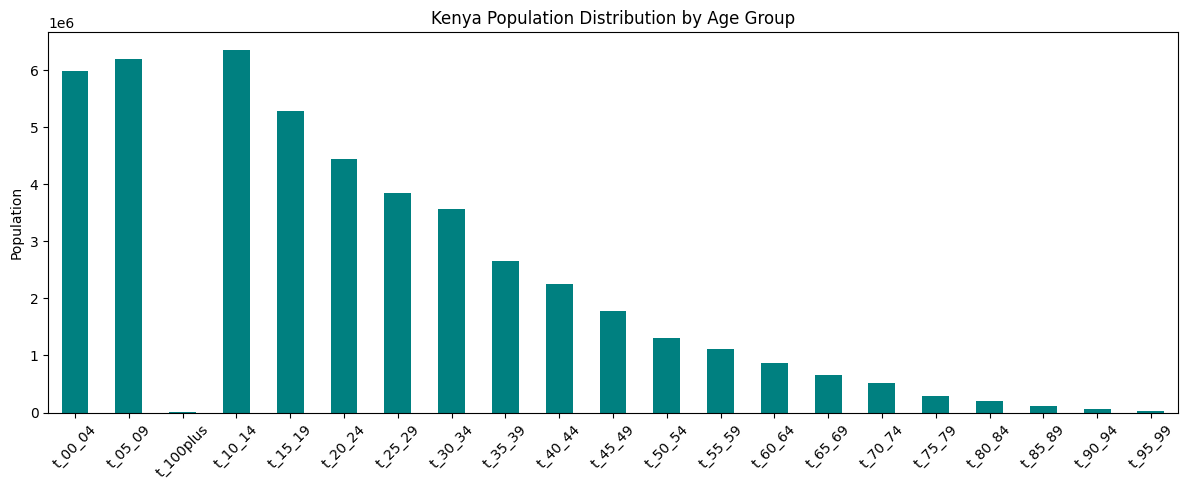

In [11]:
#
age_cols = [col for col in df.columns if col.startswith('t_') and col not in ['t_tl', 't_unstated']]
age_dist = df[age_cols].sum().sort_index()

plt.figure(figsize=(12,5))
age_dist.plot(kind='bar', color='teal')
plt.title("Kenya Population Distribution by Age Group")
plt.ylabel("Population")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



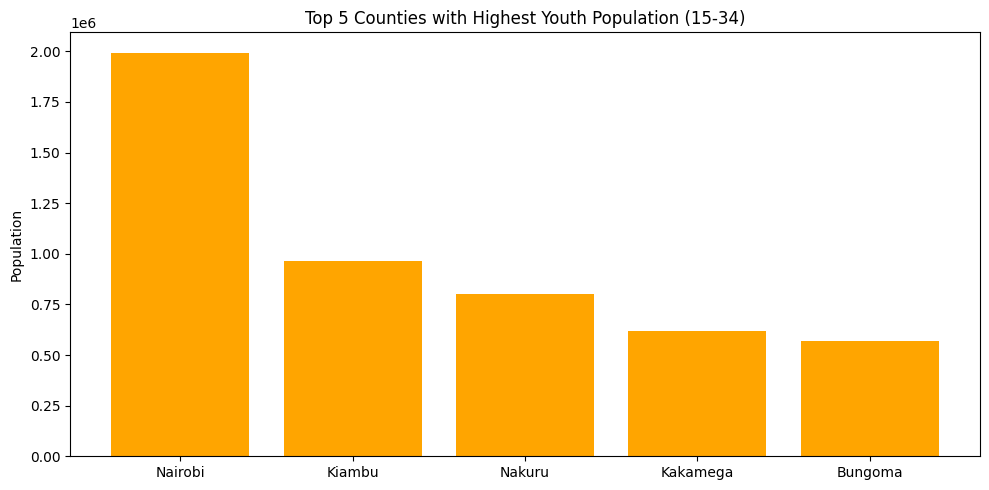

In [12]:
#
df['youth_population'] = df[['t_15_19','t_20_24','t_25_29','t_30_34']].sum(axis=1)
top_youth = df[['adm1_name', 'youth_population']].sort_values(by='youth_population', ascending=False)

plt.figure(figsize=(10,5))
plt.bar(top_youth['adm1_name'][:5], top_youth['youth_population'][:5], color='orange')
plt.title("Top 5 Counties with Highest Youth Population (15-34)")
plt.ylabel("Population")
plt.tight_layout()
plt.show()


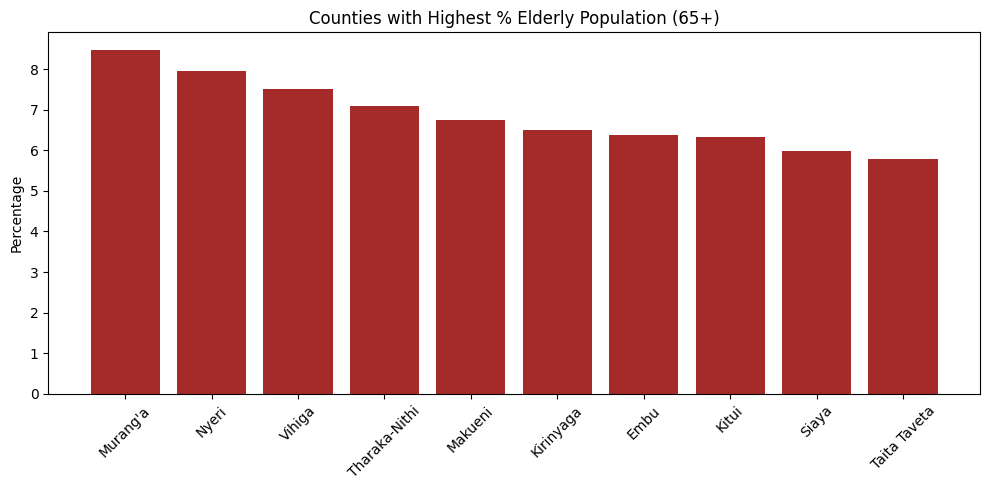

In [13]:
#
df['elderly'] = df[['t_65_69','t_70_74','t_75_79','t_80_84','t_85_89','t_90_94','t_95_99','t_100plus']].sum(axis=1)
df['elderly_percent'] = (df['elderly'] / df['t_tl']) * 100

top_elderly = df[['adm1_name', 'elderly_percent']].sort_values(by='elderly_percent', ascending=False)

plt.figure(figsize=(10,5))
plt.bar(top_elderly['adm1_name'][:10], top_elderly['elderly_percent'][:10], color='brown')
plt.title("Counties with Highest % Elderly Population (65+)")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
